<a href="https://colab.research.google.com/github/AritraN18/DEMO/blob/main/stock_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
# import chart_studio.plotly as py
# import plotly.graph_objs as go
# from plotly.offline import plot

# from plotly.offline import download_plotlyjs, iit_notebook_mode, plot , iplot
# init_notebook_mode(connected = True)


In [ ]:
%matplotlib inline

In [ ]:
!pip install plotly
!pip install chart_studio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 1.5 MB/s eta 0:00:00


In [ ]:
!pip install plotly.offline
# !pip install

ERROR: Could not find a version that satisfies the requirement plotly.offline (from versions: none)
ERROR: No matching distribution found for plotly.offline


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/stock_project.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [ ]:
df.shape
# df.size

(1009, 7)

In [ ]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


In [ ]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

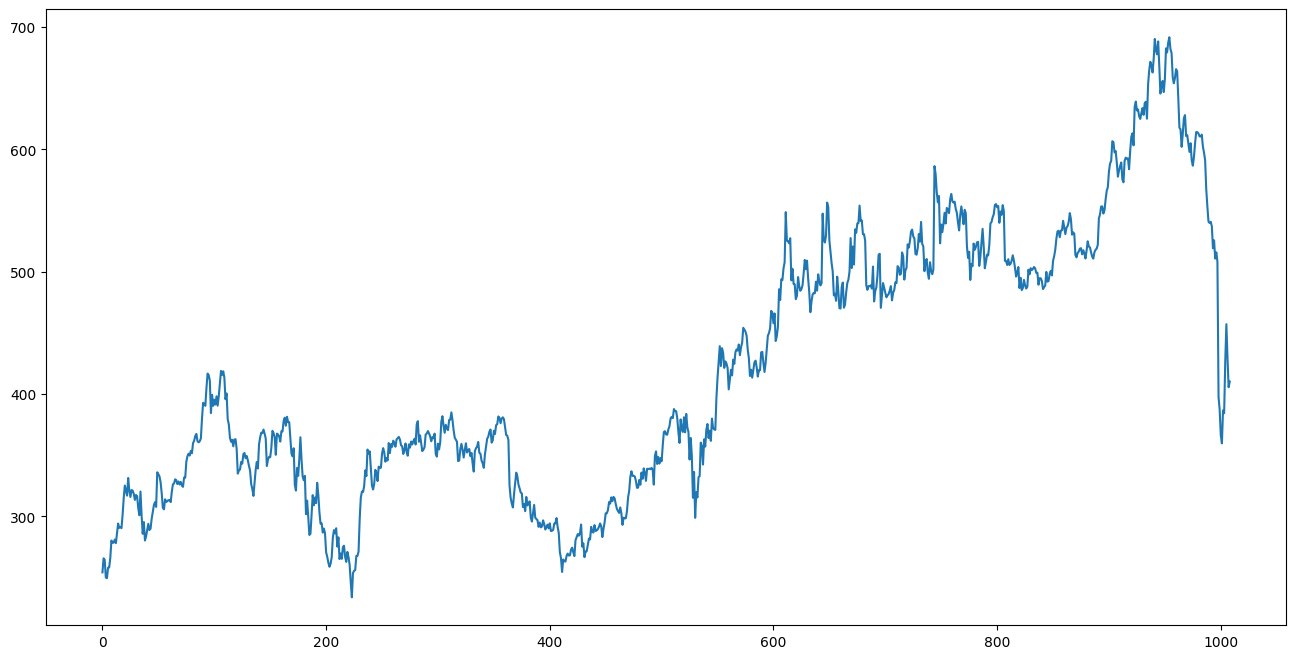

In [ ]:
plt.figure(figsize = (16,8))
plt.plot(df['Close'], label = 'Closing Price')

In [ ]:
df['open - close'] = df['Open'] - df['Close']
df['High - Low'] = df['High'] - df['Low']
df = df.dropna()

In [ ]:
x = df[['open - close','High - Low' ]]
x.head()

,open - close,High - Low
0,7.740005,17.869995
1,-18.020004,21.700012
2,2.019989,8.120025
3,16.979981,17.619995
4,4.380005,19.690002


In [ ]:
y = np.where(df['Close'].shift(-1) > df['Close'],1,-1)

In [ ]:
y

array([ 1, -1, -1, ..., -1,  1, -1])

In [ ]:
# prompt: split the data ito train, test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)


# from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0, random_state = 44)

In [ ]:
# prompt: import kneighborsclassifers, neighbors, gridsearchcv, accuracy_score from sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

params = {"n_neighbors" : [2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
knn = neighbors.KNeighborsClassifier()
model = GridSearchCV(knn, params, cv = 5)

#fit the model
model.fit(x_train, y_train)

#Accuracy score
accuracy_train = accuracy_score(y_train, model.predict(x_train))
accuracy_test = accuracy_score(y_test, model.predict(x_test))


print('the trai_data accuracy is:%.2f' %accuracy_train)
print('test_data accuracy is :%.2f' %accuracy_test)

the trai_data accuracy is:0.74
test_data accuracy is :0.50


In [ ]:
prediction_classificatio = model.predict(x_test)
actual_predicted_data = pd.DataFrame({'Actual Class': y_test, 'Prediction Class': prediction_classificatio })

In [ ]:
actual_predicted_data.head(10)

,Actual Class,Prediction Class
0,-1,-1
1,-1,1
2,-1,-1
3,-1,1
4,-1,1
5,1,-1
6,-1,1
7,1,-1
8,-1,-1
9,-1,-1


In [ ]:
y = df['Close']
y

0       254.259995
1       265.720001
2       264.559998
3       250.100006
4       249.470001
           ...    
1004    427.140015
1005    457.130005
1006    429.480011
1007    405.600006
1008    410.170013
Name: Close, Length: 1009, dtype: float64

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors

x_train_reg, x_test_reg, y_train_reg, y_test_reg = train_test_split(x, y, test_size = 0.25)

params = {"n_neighbors" : [2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
knn_reg = neighbors.KNeighborsRegressor()
model_reg = GridSearchCV(knn_reg, params, cv=5)

model_reg.fit(x_train_reg, y_train_reg )
predictions = model_reg.predict(x_test_reg)

In [ ]:
print(predictions)

[433.44866533 360.91933593 398.54199833 463.35667313 401.60333253
 453.71866667 436.83666587 376.27600307 437.91333207 498.80199787
 413.5373352  489.74932867 429.169338   366.4800008  374.54399627
 404.28599847 423.4613342  414.57866407 346.31599527 414.8273316
 438.8099976  468.08666173 418.35599773 436.96400147 433.06933587
 392.9873312  447.98333233 406.40933627 351.95399993 396.43466787
 377.7526712  352.7713298  434.15333447 423.1373332  461.43799647
 496.4713358  330.4253336  467.23333133 363.20999347 365.01066707
 412.40133067 422.89667147 428.78466593 427.5319966  484.20666907
 374.3786642  452.3593342  409.41399933 470.60800173 397.14733887
 425.38399873 476.5926676  415.78732913 362.25000007 389.40600593
 347.71266887 318.3866638  445.27999873 420.80467333 453.6906656
 478.38733313 387.84066987 413.02266653 438.80732627 453.8126668
 434.9026632  435.76733187 403.44600027 422.60066947 337.71599527
 417.70533253 426.36333213 487.8440022  437.28067227 351.52266853
 440.9339986 

In [ ]:
rms = np.sqrt(np.mean(np.power((np.array(y_test)-np.array(predictions)),2)))
rms

418.05058096854907

In [ ]:
valid = pd.DataFrame({'Actual Close': y_test_reg, 'Predicted Close value': predictions})

In [ ]:
valid.head(10)

,Actual Close,Predicted Close value
119,363.089996,433.448665
391,294.980011,360.919336
595,447.769989,398.541998
710,490.700012,463.356673
126,350.920013,401.603333
816,503.179993,453.718667
794,539.419983,436.836666
757,547.919983,376.276003
419,272.790009,437.913332
614,523.260010,498.801998
